In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-dataset/hour.csv
/kaggle/input/bike-sharing-dataset/Readme.txt
/kaggle/input/bike-sharing-dataset/day.csv


In [2]:
#Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the datasets
Hour_df= pd.read_csv("/kaggle/input/bike-sharing-dataset/hour.csv")
Day_df= pd.read_csv("/kaggle/input/bike-sharing-dataset/day.csv")

In [4]:
Hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
Hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
Hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
Hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
Day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [9]:
Day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
Day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
Day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Analyze peak ridership periods

In [12]:
peak_hours = Hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print(peak_hours.head(10))

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
Name: cnt, dtype: float64


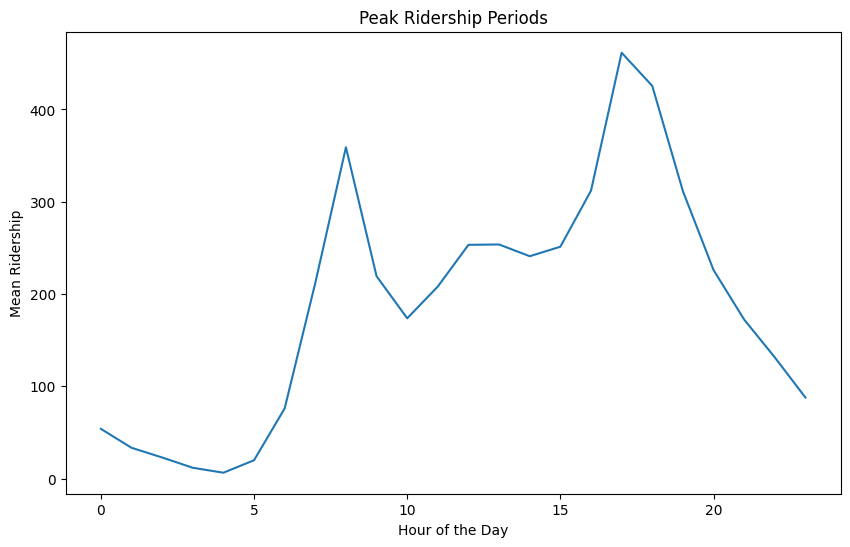

In [13]:
hourly_ridership = Hour_df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(10,6))
plt.plot(hourly_ridership.index, hourly_ridership.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Ridership')
plt.title('Peak Ridership Periods')
plt.show()

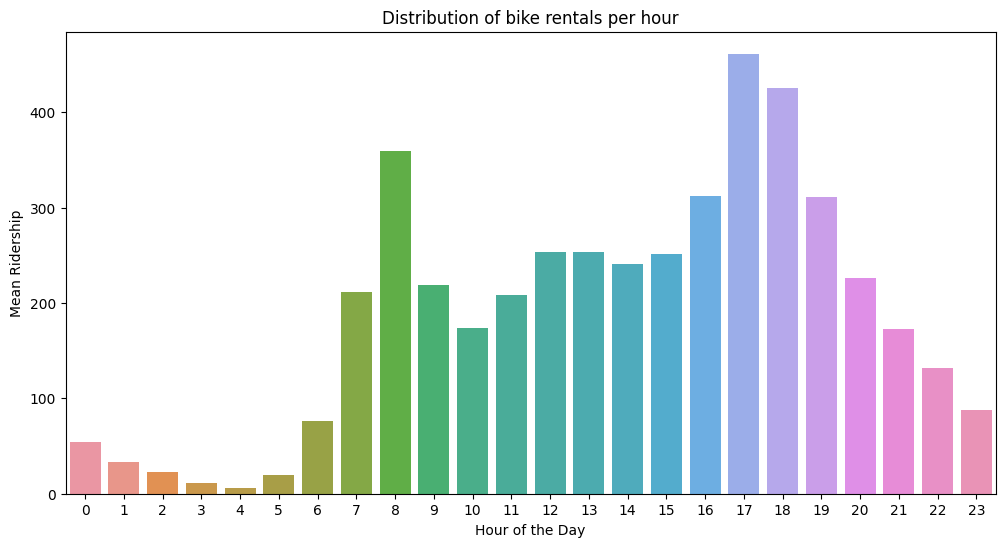

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x=hourly_ridership.index, y=hourly_ridership.values)
plt.title('Distribution of bike rentals per hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Ridership')
plt.show()

Analyze popular stations

In [15]:
popular_stations = Day_df.groupby('instant')['cnt'].mean().sort_values(ascending=False)
print(popular_stations.head(10))

instant
624    8714.0
638    8555.0
631    8395.0
448    8362.0
505    8294.0
618    8227.0
572    8173.0
630    8167.0
644    8156.0
519    8120.0
Name: cnt, dtype: float64


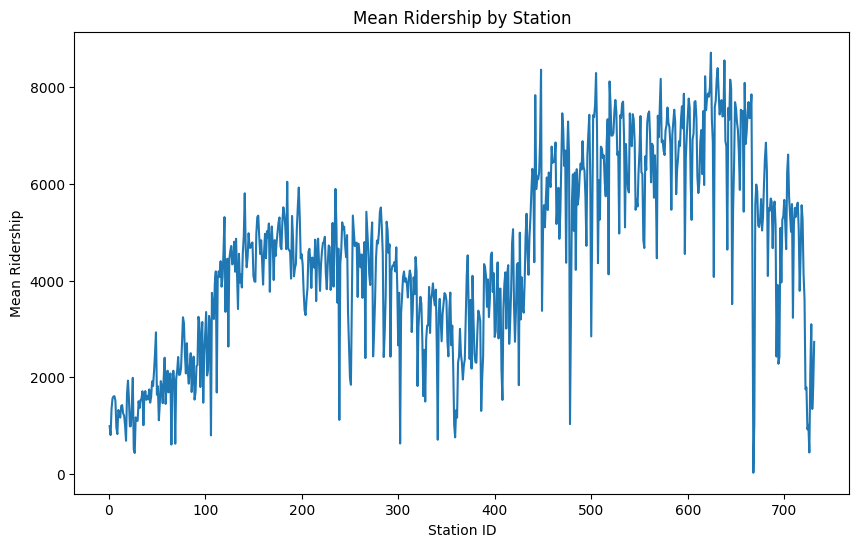

In [16]:
station_ridership = Day_df.groupby('instant')['cnt'].mean()
plt.figure(figsize=(10,6))
plt.plot(station_ridership.index, station_ridership.values)
plt.xlabel('Station ID')
plt.ylabel('Mean Ridership')
plt.title('Mean Ridership by Station')
plt.show()

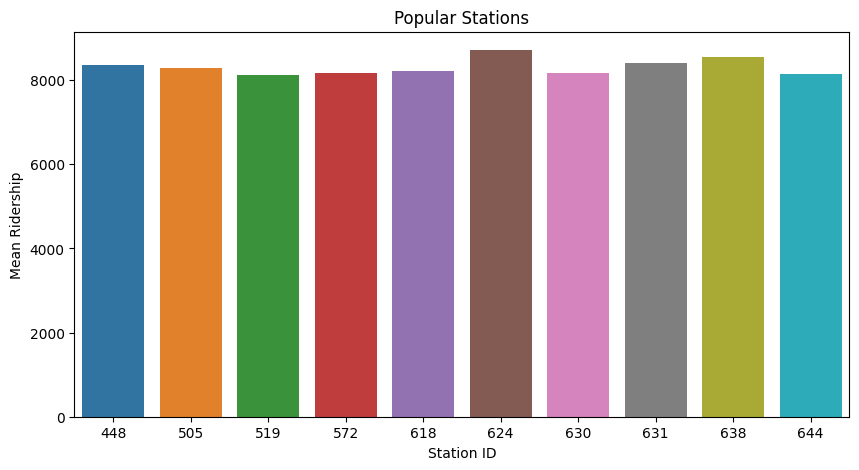

In [17]:
station_ridership = Day_df.groupby('instant')['cnt'].mean()
plt.figure(figsize=(10,5))
sns.barplot(x=station_ridership.nlargest(10).index, y=station_ridership.nlargest(10).values)
plt.xlabel('Station ID')
plt.ylabel('Mean Ridership')
plt.title('Popular Stations')
plt.show()

Analyze user type variations

In [18]:
user_type_ridership = Hour_df.groupby(['hr', 'registered'])['cnt'].mean().sort_values(ascending=False)
print(user_type_ridership)

hr  registered
18  886           977.00
17  885           976.00
    802           970.00
18  857           968.00
17  860           967.00
                   ...  
4   0               1.25
1   1               1.20
    0               1.00
5   0               1.00
3   0               1.00
Name: cnt, Length: 6010, dtype: float64


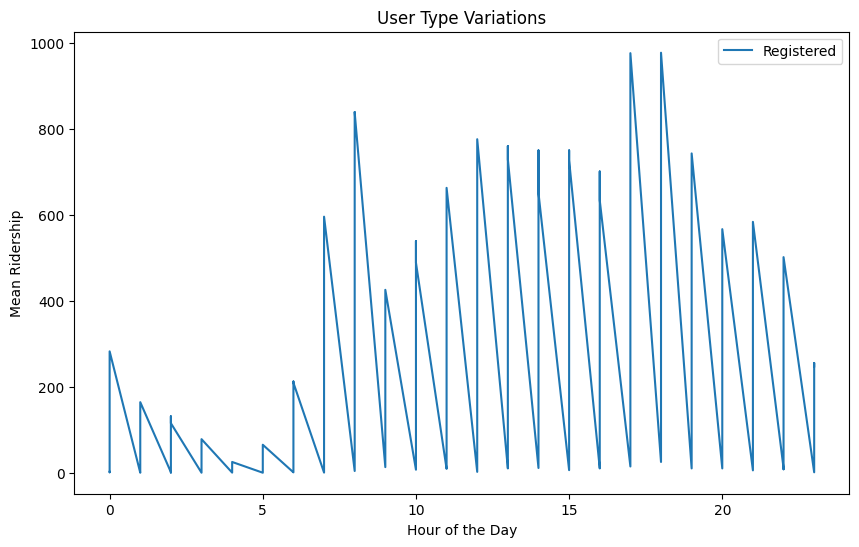

In [19]:
user_type_ridership = Hour_df.groupby(['hr', 'registered'])['cnt'].mean()
plt.figure(figsize=(10,6))
plt.plot(user_type_ridership.index.get_level_values('hr'), user_type_ridership.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Ridership')
plt.title('User Type Variations')
plt.legend(['Registered', 'Casual'])
plt.show()

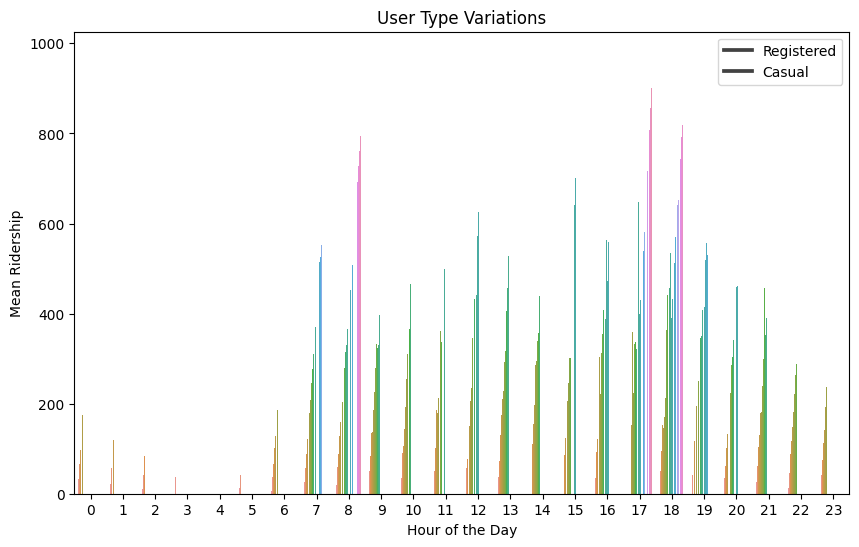

In [20]:
user_type_ridership = Hour_df.groupby(['hr', 'registered'])['cnt'].mean()
plt.figure(figsize=(10,6))
sns.barplot(x=user_type_ridership.index.get_level_values('hr'), y=user_type_ridership.values, hue=user_type_ridership.index.get_level_values('registered'))
plt.xlabel('Hour of the Day')
plt.ylabel('Mean Ridership')
plt.title('User Type Variations')
plt.legend(['Registered', 'Casual'], loc='upper right')
plt.show()

Analyze weather influences

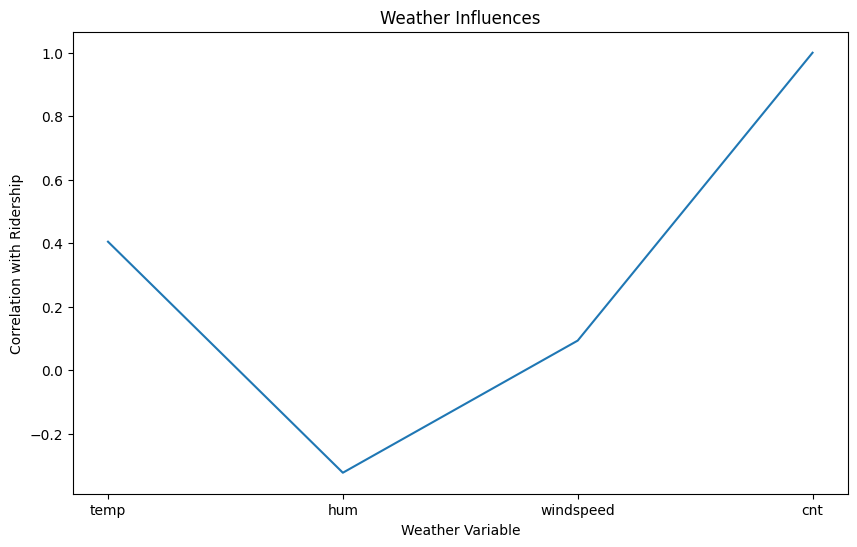

In [21]:
weather_corr = Hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(10,6))
plt.plot(weather_corr['cnt'].index, weather_corr['cnt'].values)
plt.xlabel('Weather Variable')
plt.ylabel('Correlation with Ridership')
plt.title('Weather Influences')
plt.show()

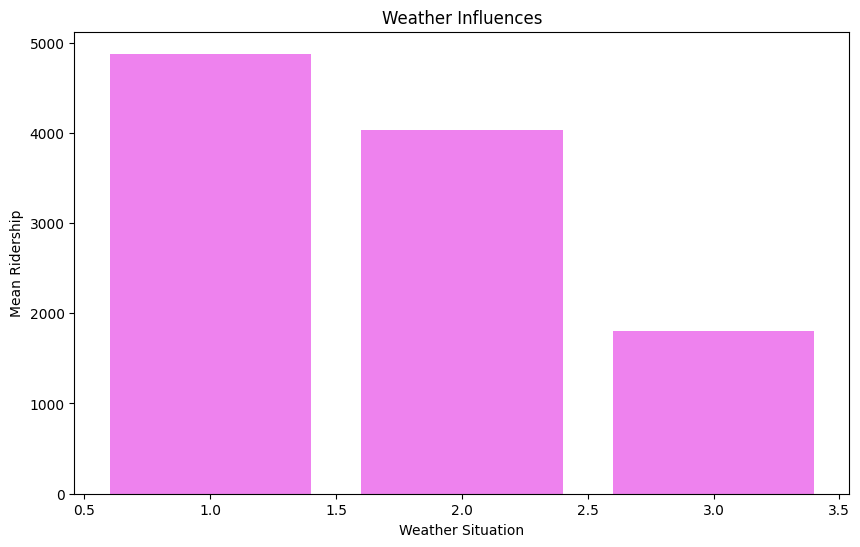

In [22]:
weather_ridership = Day_df.groupby('weathersit')['cnt'].mean()
plt.figure(figsize=(10,6))
plt.bar(weather_ridership.index, weather_ridership.values, color="Violet")
plt.xlabel('Weather Situation')
plt.ylabel('Mean Ridership')
plt.title('Weather Influences')
plt.show()

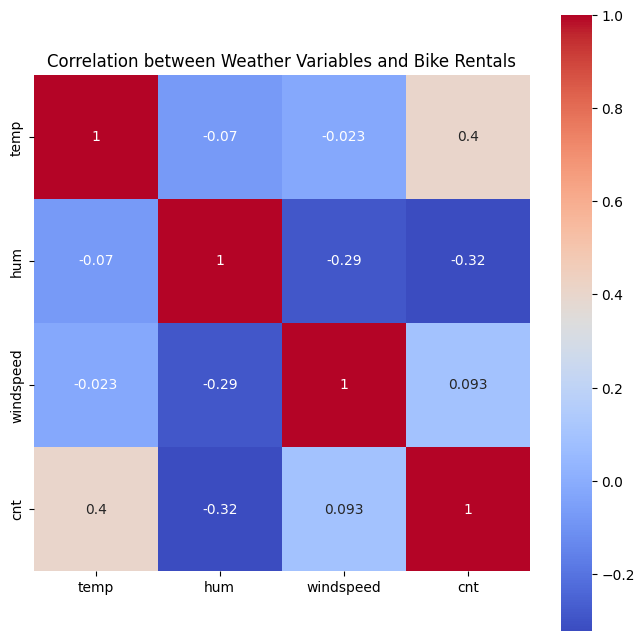

In [23]:
weather_corr = Hour_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Weather Variables and Bike Rentals')
plt.show()